Data: <a href='https://github.com/CSSEGISandData/COVID-19'>https://github.com/CSSEGISandData/COVID-19</a>. 
    <br>
    <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>WHO</a>
    <br>Learn more from the <a href='https://www.cdc.gov/coronavirus/2019-ncov'>CDC</a>
    <br>Map Visualizations from  <a href='https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'>Johns Hopkins</a>
    






In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
%matplotlib inline 

Import the data (make sure you update this on a daily basis)

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,Central African Republic,6.6111,20.9394,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
446,NaN,Congo (Brazzaville),-4.0383,21.7587,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
448,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

Get all the dates for the outbreak

In [5]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

# 세계데이터 확진자수, 사망자수, 완치자수 EDA

In [6]:
dates = confirmed.keys()
world_cases = [] # for문을 돌면서 1/22 일부터 전세계 일별 확진자수 sum()해서 모음
total_deaths = [] 
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    

In [7]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)


In [8]:
# Future forcasting
days_in_future = 5
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

#Convert integer into datetime for better visualization
# x축으로 날짜 시각화를 위해서 datetime 함수를 이용해서 
start = '2020/1/22'
start_date = datetime.datetime.strptime(start, '%Y/%m/%d')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d'))
adjusted_dates = future_forcast_dates[:-5]
#adjusted_dates # 현재 그래프 시각화용 만듦
#future_forcast_dates # ~예측용 시각화

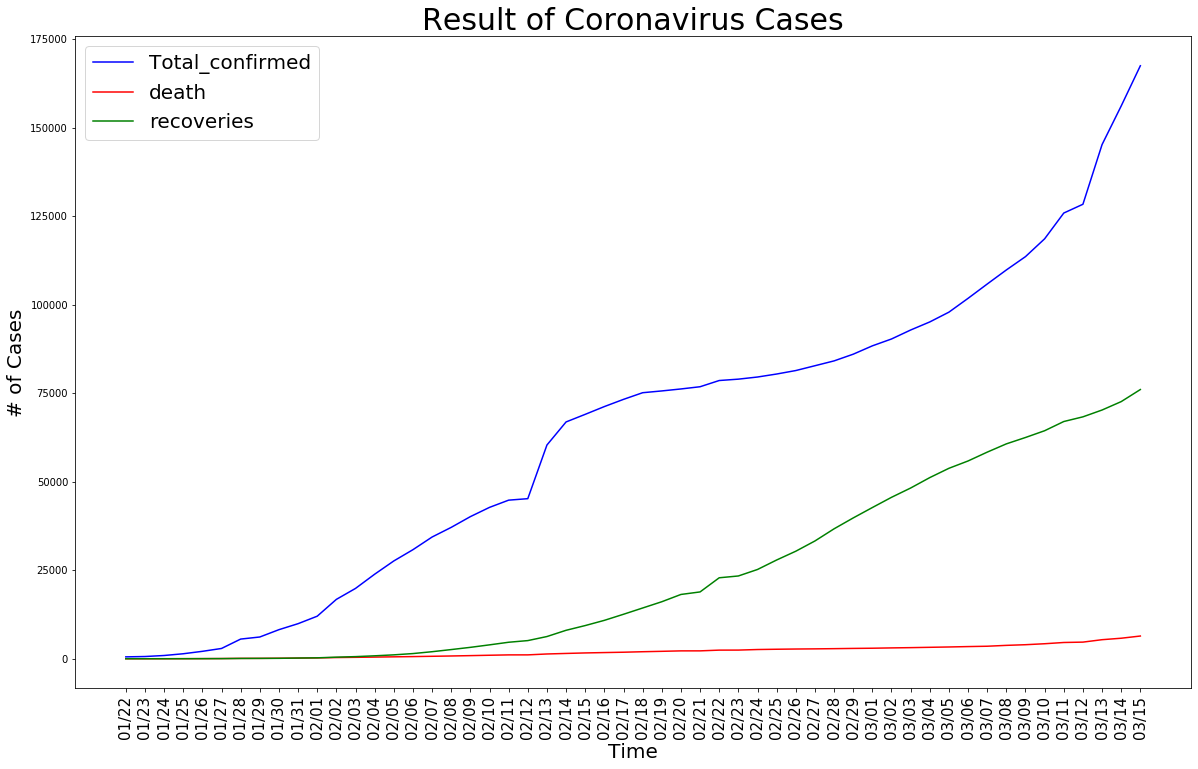

In [9]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='blue')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['Total_confirmed','death', 'recoveries'], loc='best', fontsize=20)
plt.title('Result of Coronavirus Cases', size=30)
plt.xlabel('Time', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(rotation=90, size=15)
plt.show()

# 한국 데이터 정리하기.

In [10]:
korea_Cf = confirmed_df[confirmed_df['Country/Region'] == 'Korea, South' ]
korea_death = deaths_df[deaths_df['Country/Region'] == 'Korea, South' ]
korea_Rc = recoveries_df[recoveries_df['Country/Region'] == 'Korea, South' ]

korea_Cf = korea_Cf.loc[:, cols[4]:cols[-1]]
korea_death = korea_death.loc[:, cols[4]:cols[-1]]
korea_Rc = korea_Rc.loc[:, cols[4]:cols[-1]]

In [11]:
korea_Cf.index = ['Korea']
korea_Cf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
Korea,1,1,2,2,3,4,4,4,4,11,...,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162


In [12]:
korea_death.index = ['Korea']
korea_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
Korea,0,0,0,0,0,0,0,0,0,0,...,42,44,50,53,54,60,66,66,72,75


In [13]:
korea_Rc.index = ['Korea']
korea_Rc

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
Korea,0,0,0,0,0,0,0,0,0,0,...,135,135,118,118,247,288,333,510,510,510


In [14]:
Accumulated_in_Korea= np.array(korea_Cf).reshape(-1, 1)
Accumulated_deceased= np.array(korea_death).reshape(-1, 1)
Accumulated_recovered= np.array(korea_Rc).reshape(-1, 1)

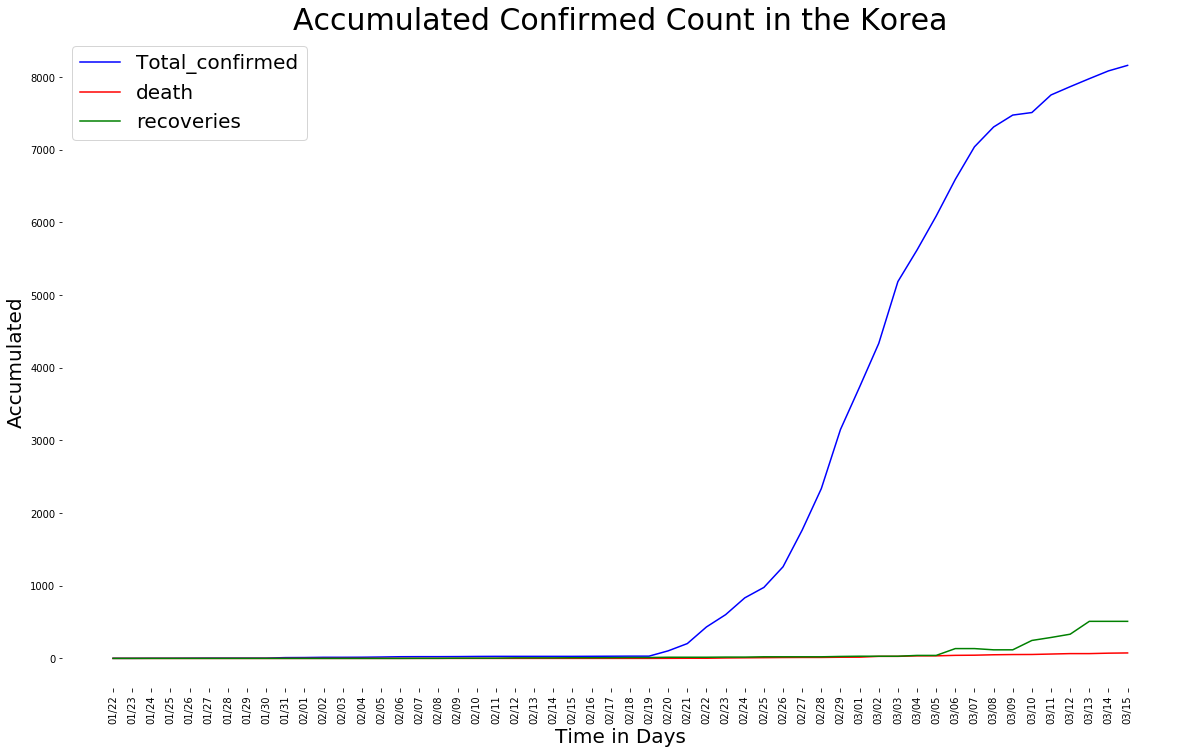

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Accumulated_in_Korea, color='blue')
plt.plot(adjusted_dates, Accumulated_deceased, color='red')
plt.plot(adjusted_dates, Accumulated_recovered, color='green')
plt.title('Accumulated Confirmed Count in the Korea', size=30)
plt.xlabel('Time in Days', size=20)
plt.ylabel('Accumulated', size=20)
plt.xticks(rotation=90)
plt.legend(['Total_confirmed','death', 'recoveries'], loc='best', fontsize=20)
plt.box(False)
plt.show()

# 중국 본토내  데이터.

중국이나 미국등 대륙은 시/주별로 데이터가 나눠서 있어 합산해서 사용하야합니다.

In [16]:
China_Cf = confirmed_df[confirmed_df['Country/Region'] == 'China' ]
China_Dt = deaths_df[deaths_df['Country/Region'] == 'China' ]
China_Rc = recoveries_df[recoveries_df['Country/Region'] == 'China' ]

China_Cf = China_Cf.loc[:, cols[4]:cols[-1]]
China_Dt = China_Dt.loc[:, cols[4]:cols[-1]]
China_Rc = China_Rc.loc[:, cols[4]:cols[-1]]

In [17]:
dates = confirmed.keys()
China_sum = []
China_death = []
China_recovered = []
for i in dates:
    confirmed_china = China_Cf[i].sum() 
    deceased_china = China_Dt[i].sum() 
    recovered_china = China_Rc[i].sum()
    China_sum.append(confirmed_china)
    China_death.append(deceased_china)
    China_recovered.append(recovered_china)

In [18]:
Accumulated_in_China= np.array(China_sum).reshape(-1, 1)
Accumulated_deceased_in_China= np.array(China_death).reshape(-1, 1)
Accumulated_recovered_in_China= np.array(China_recovered).reshape(-1, 1)


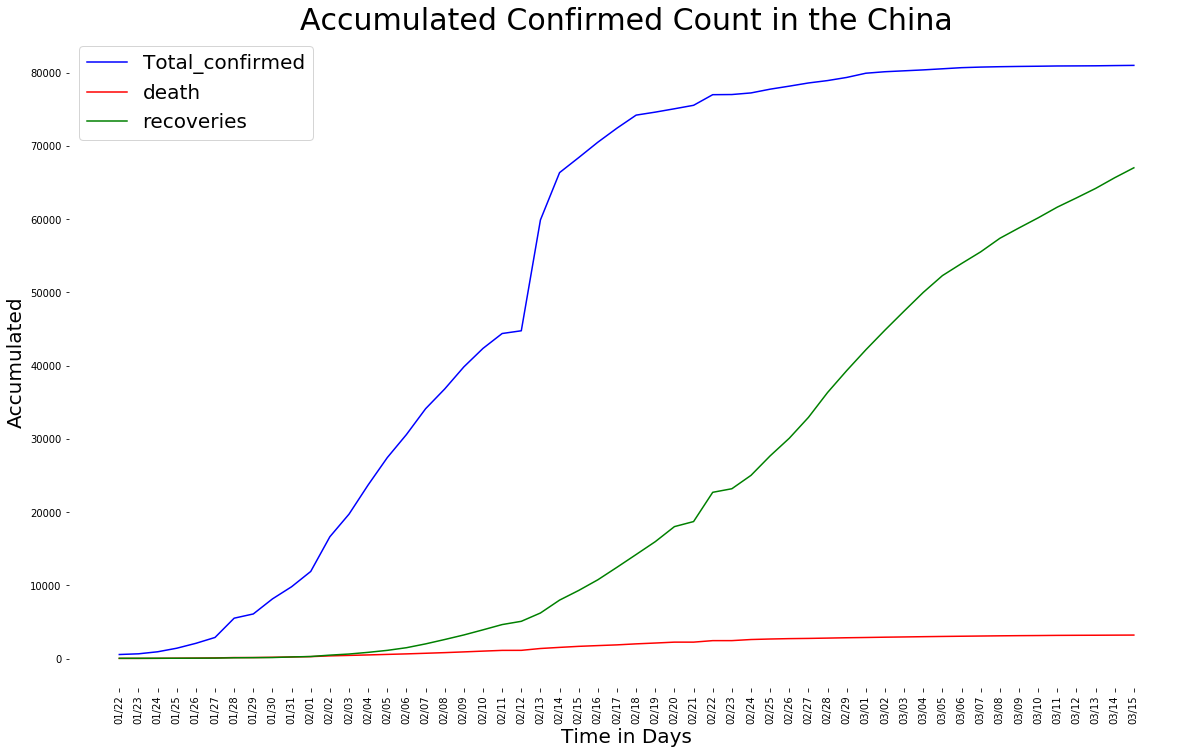

In [19]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Accumulated_in_China, color='blue')
plt.plot(adjusted_dates, Accumulated_deceased_in_China, color='red')
plt.plot(adjusted_dates, Accumulated_recovered_in_China, color='green')
plt.title('Accumulated Confirmed Count in the China', size=30)
plt.xlabel('Time in Days', size=20)
plt.ylabel('Accumulated', size=20)
plt.xticks(rotation=90)
plt.legend(['Total_confirmed','death', 'recoveries'], loc='best', fontsize=20)
plt.box(False)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

import seaborn as sns
import scipy as sp

# Prophet 시계열분석모델

In [22]:
df_prophet = korea_Cf.T
df_prophet = df_prophet.reset_index()
df_prophet = df_prophet.rename(columns={ 'index': 'ds', 'Korea': 'y' })

df_prophet

,ds,y
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,3
5,1/27/20,4
6,1/28/20,4
7,1/29/20,4
8,1/30/20,4
9,1/31/20,11


In [ ]:
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.95, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(df_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [ ]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
sns.distplot(m.params["delta"], kde=False, fit=sp.stats.laplace)
plt.box(False)

# 선형회귀 예측모델

Model for predicting # of confirmed cases.  using support vector machine and linear regression 

# 현재 데이터들은 선형회귀모델에는 맞지않습니다.

# 국내 EDA 시각화.
2/19일 이후부터 데이터로만 그리면 선형회귀에 그려지긴 하지만, 설명력은 없는것으로 확인되었습니다.
단기간으로 선형으로 예측이 증가하는 추세이지만 앞으로는 수렴하는 형태로 변할것으로 보이기 때문입니다.
비선형회귀모델도 그래볼까했지만 현재로는 비계절성 ARIMA, prophet 모델이 가장 좋아보입니다.

In [26]:
dates[28:]

Index(['2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [27]:
date = dates[28:]
days_since_2_19 = np.array([i for i in range(len(date))]).reshape(-1, 1)

In [28]:
Accumulated_in_Korea = Accumulated_in_Korea[28:]

In [29]:
from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_2_19, Accumulated_in_Korea, test_size=0.1, shuffle=False) 

In [30]:
# Future forcasting
days_in_future = 3
dates = pd.date_range('2020-2-19','2020-3-15')
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
# future_forcast #3일을 추가해서 = 47일까지 미래 3일의 그래프를 그려본다.

In [31]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
degree = [1,2.3,4,5,6,7]
gamma = [0.01, 0.1, 1, 10]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree':degree}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svm = SVR()
svm_search = GridSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 4184 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:    7.5s finished
C:\Users\SJY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\SJY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'degree': [1, 2.3, 4, 5, 6, 7],
                         'epsilon': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
svm_search.best_params_

{'C': 10,
 'degree': 1,
 'epsilon': 1,
 'gamma': 0.01,
 'kernel': 'linear',
 'shrinking': True}

In [33]:
svm_search.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=1, epsilon=1, gamma=0.01,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
svm_pred = svm_search.best_estimator_.predict(future_forcast)
svm_pred

array([ -589.84210526,  -192.42105263,   205.        ,   602.42105263,
         999.84210526,  1397.26315789,  1794.68421053,  2192.10526316,
        2589.52631579,  2986.94736842,  3384.36842105,  3781.78947368,
        4179.21052632,  4576.63157895,  4974.05263158,  5371.47368421,
        5768.89473684,  6166.31578947,  6563.73684211,  6961.15789474,
        7358.57894737,  7756.        ,  8153.42105263,  8550.84210526,
        8948.26315789,  9345.68421053,  9743.10526316, 10140.52631579,
       10537.94736842])

In [35]:
import statsmodels.api as sm

lm= sm.OLS(X_train_confirmed,y_train_confirmed)
results =lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1029.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                    5.74e-20
Time:                        16:58:00   Log-Likelihood:                         -46.889
No. Observations:                  23   AIC:                                      95.78
Df Residuals:                      22   BIC:                                      96.91
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0026   8.24e-05     32.079      0.000       0.002       0.003
==============================================================================
Omnibus:                        3.755   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                1.474
Skew:                           0.142   Prob(JB):                        0.479
Kurtosis:                       1.793   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed,y_train_confirmed)

test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)

print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
linear_model.coef_

MAE: 812.4534914361011
MSE: 711967.9445088464


array([[370.33833992]])

In [37]:
Accumulated_in_Korea= np.array(Accumulated_in_Korea).reshape(-1, 1) 

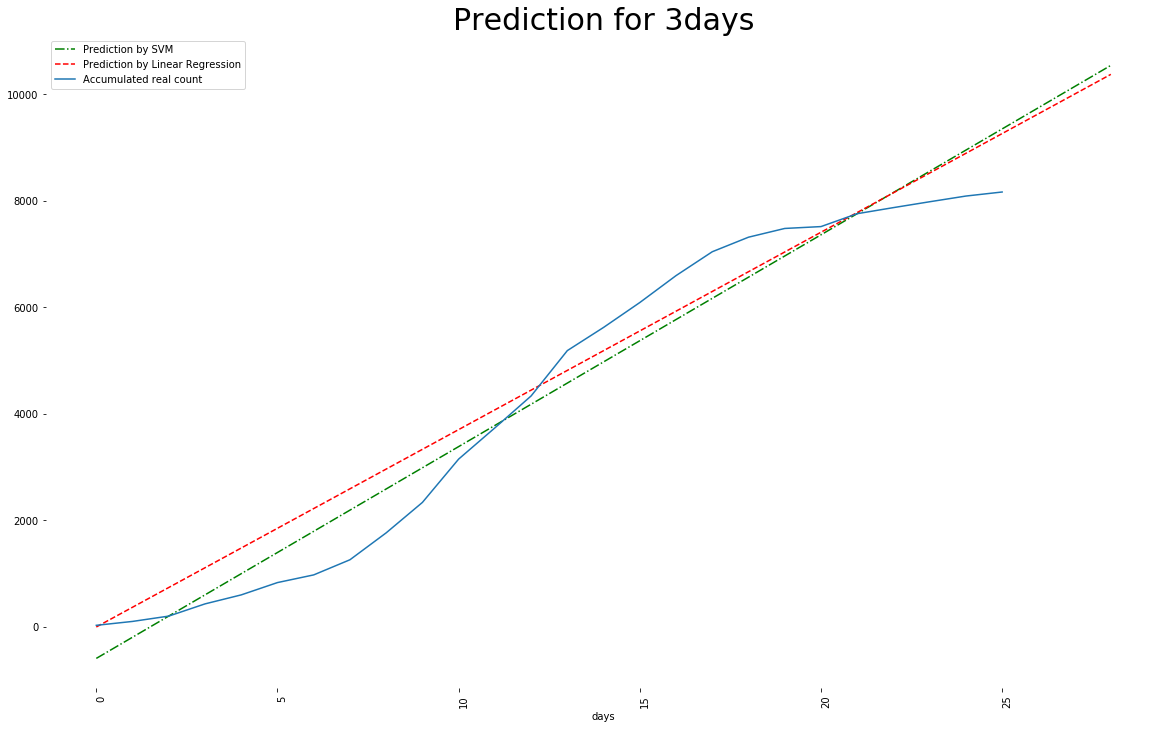

In [38]:
plt.figure(figsize=(20, 12))
plt.title('Prediction for 3days', size=30)
plt.plot(svm_pred, color='green', ls='-.', label = 'Prediction by SVM')
plt.plot(linear_pred, color='red', ls='--', label='Prediction by Linear Regression')
plt.plot(Accumulated_in_Korea, label='Accumulated real count')
plt.xlabel('days')
plt.xticks(rotation=90, ha='left')
plt.legend()
plt.box(False)